In [1]:
import pandas as pd
import os
import geopandas as gpd
import numpy as np
from geodatasets import get_path
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

In [3]:
dir = "GLOBFIRE_burned_area_full_dataset_2002_2023"
fp = os.path.join(dir,'original_globfire_filtered_2022.shp')

In [4]:
data = gpd.read_file(fp)
data

,_uid_,id,initialdat,finaldate,area_ha,geometry
0,1.0,25688592.0,2022-08-23,2022-08-30,364.626801,"POLYGON ((28.06051 -31.58333, 28.06176 -31.587..."
1,2.0,25688596.0,2022-08-26,2022-08-26,21.448625,"POLYGON ((27.51270 -31.58333, 27.51759 -31.583..."
2,3.0,25688597.0,2022-08-19,2022-08-19,21.448625,"POLYGON ((27.74258 -31.58333, 27.74747 -31.583..."
3,4.0,25688598.0,2022-08-12,2022-08-17,85.794575,"POLYGON ((29.09025 -31.59167, 29.09155 -31.595..."
4,5.0,25688599.0,2022-08-28,2022-08-28,21.448625,"POLYGON ((29.20504 -31.58333, 29.20993 -31.583..."
...,...,...,...,...,...,...
961889,961890.0,25688587.0,2022-08-28,2022-08-28,21.448457,"POLYGON ((29.11996 -31.54583, 29.12485 -31.545..."
961890,961891.0,25688589.0,2022-08-12,2022-08-16,257.382331,"POLYGON ((27.86477 -31.56667, 27.86602 -31.570..."
961891,961892.0,25688590.0,2022-08-13,2022-08-17,107.242460,"MULTIPOLYGON (((29.25850 -31.56667, 29.26339 -..."
961892,961893.0,25688591.0,2022-08-16,2022-08-16,128.695033,"POLYGON ((27.45032 -31.57083, 27.46011 -31.570..."


In [6]:
shapefiles = [os.path.join(dir, f) for f in os.listdir(dir) if f.endswith('.shp')]

In [7]:
western_us_polygon = Polygon([
    (-125, 32),  # SW
    (-125, 49),  # NW
    (-102, 49),  # NE
    (-102, 32),  # SE
    (-125, 32)   # close
])
western_us_gdf = gpd.GeoDataFrame([1], geometry=[western_us_polygon], crs='EPSG:4326')

In [11]:
WUS_fire_data = []
for shapefile in shapefiles:
    data = gpd.read_file(shapefile)
    
    # make sure format is same
    if data.crs != 'EPSG:4326':
        data = data.to_crs('EPSG:4326')
    
    # filter for western US
    fires_in_western_us = gpd.overlay(data, western_us_gdf, how='intersection')
    
    # append to list 
    WUS_fire_data.append(fires_in_western_us)

In [12]:
WUS_fires = pd.concat( WUS_fire_data, ignore_index=True)

In [13]:
WUS_fires['year'] = pd.to_datetime(WUS_fires['initialdat']).dt.year
WUS_fires['fire_area_ha'] = WUS_fires['area_ha']

<Figure size 2000x1200 with 0 Axes>

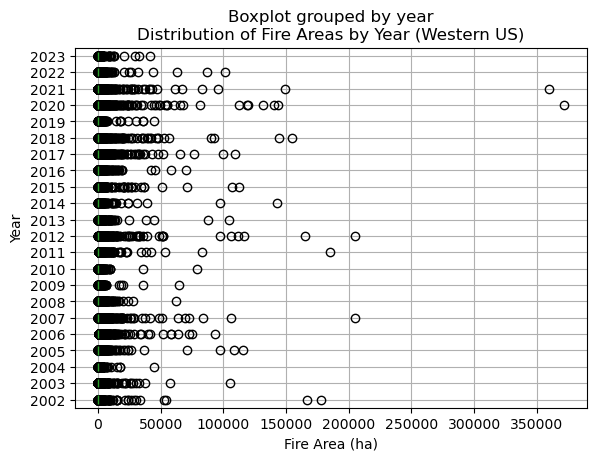

In [16]:
plt.figure(figsize=(20, 12))
WUS_fires.boxplot(column='fire_area_ha', by='year', vert=False)
plt.title('Distribution of Fire Areas by Year (Western US)')
plt.xlabel('Fire Area (ha)')
plt.ylabel('Year')
plt.grid(True)
plt.show()

<Figure size 1200x1200 with 0 Axes>

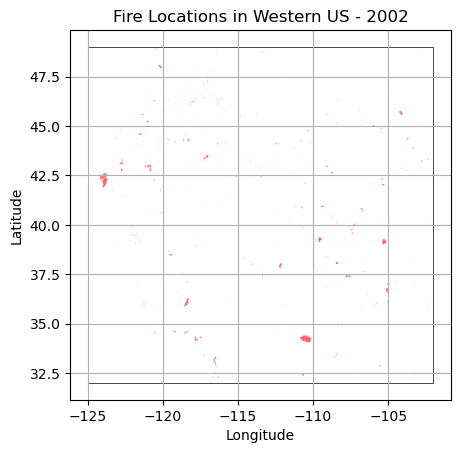

<Figure size 640x480 with 0 Axes>

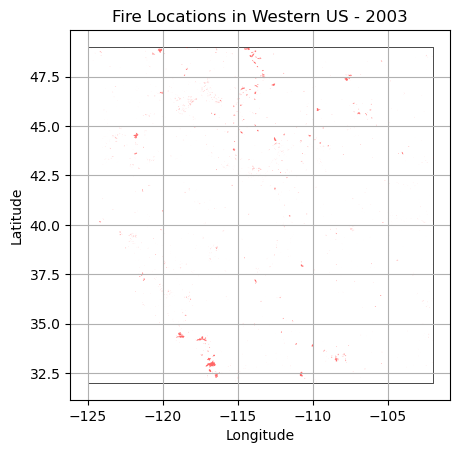

<Figure size 640x480 with 0 Axes>

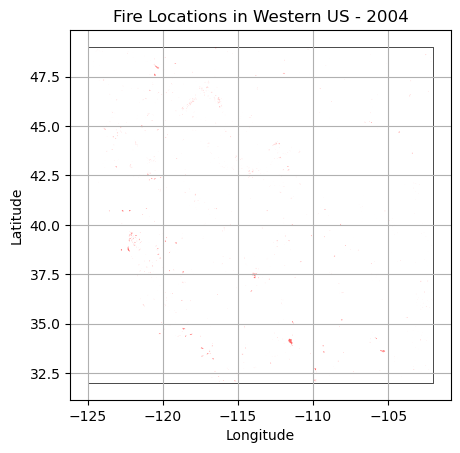

<Figure size 640x480 with 0 Axes>

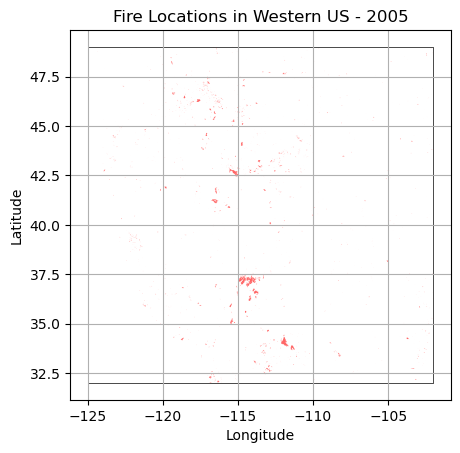

<Figure size 640x480 with 0 Axes>

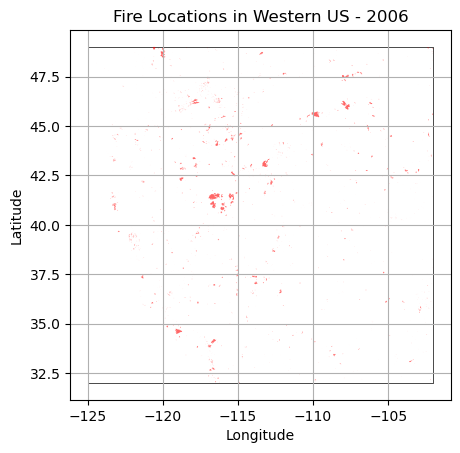

<Figure size 640x480 with 0 Axes>

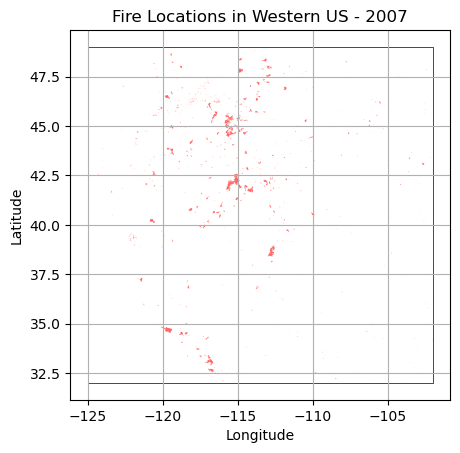

<Figure size 640x480 with 0 Axes>

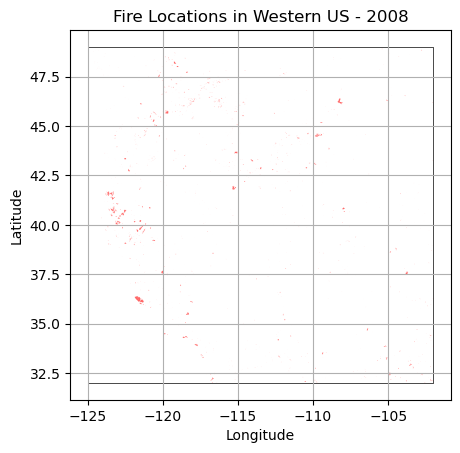

<Figure size 640x480 with 0 Axes>

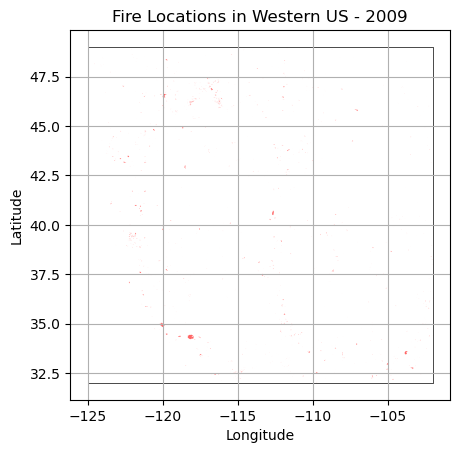

<Figure size 640x480 with 0 Axes>

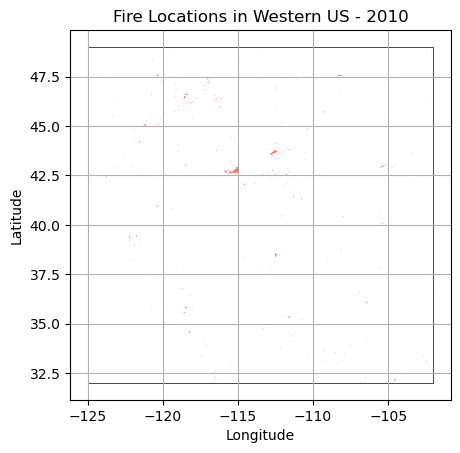

<Figure size 640x480 with 0 Axes>

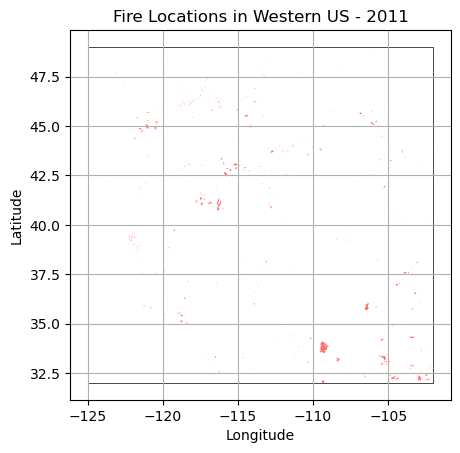

<Figure size 640x480 with 0 Axes>

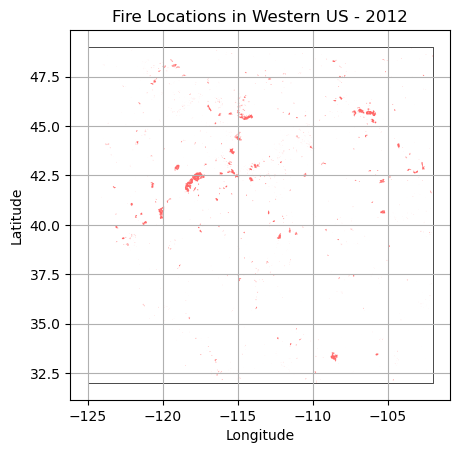

<Figure size 640x480 with 0 Axes>

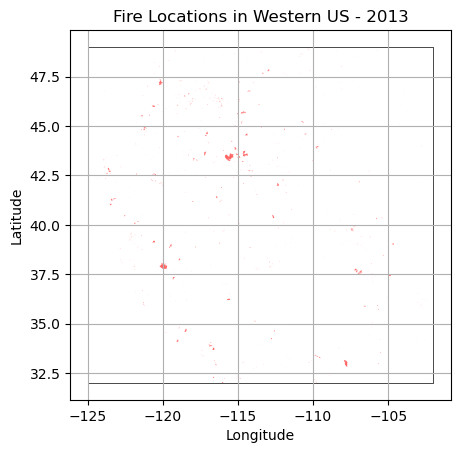

<Figure size 640x480 with 0 Axes>

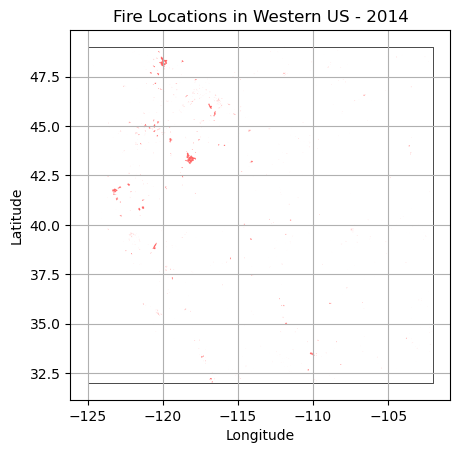

<Figure size 640x480 with 0 Axes>

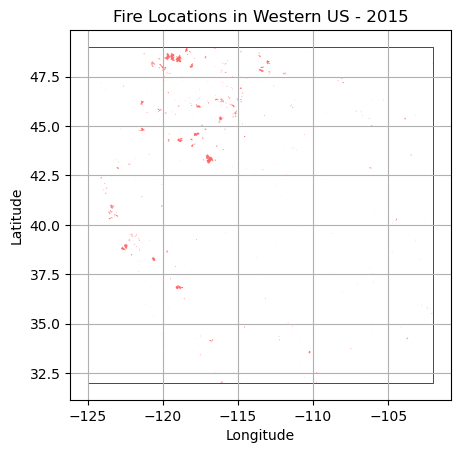

<Figure size 640x480 with 0 Axes>

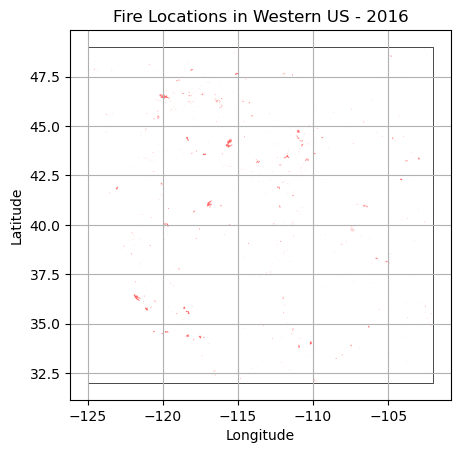

<Figure size 640x480 with 0 Axes>

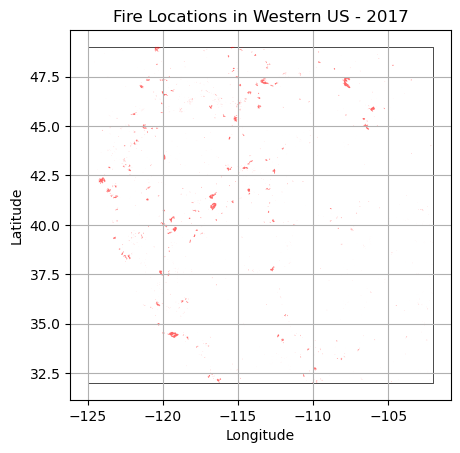

<Figure size 640x480 with 0 Axes>

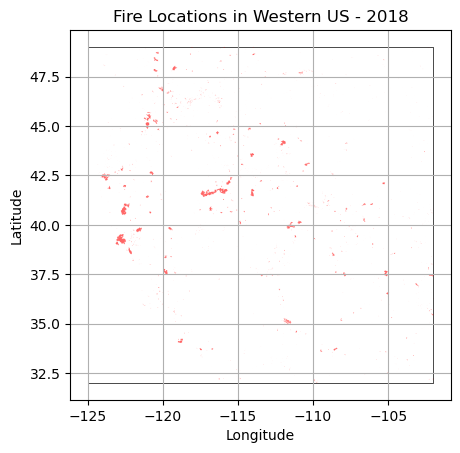

<Figure size 640x480 with 0 Axes>

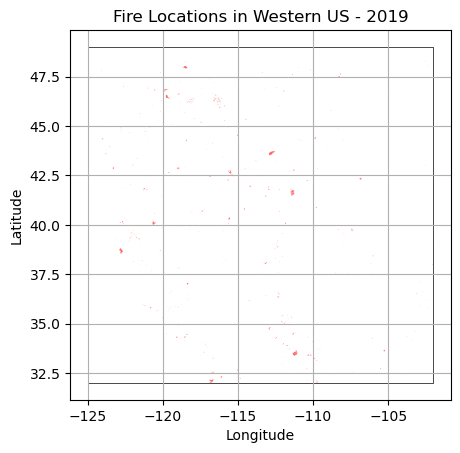

<Figure size 640x480 with 0 Axes>

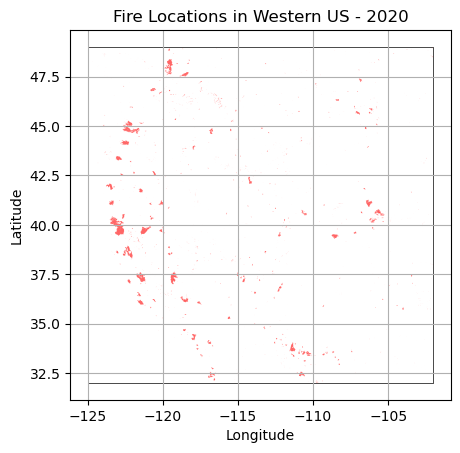

<Figure size 640x480 with 0 Axes>

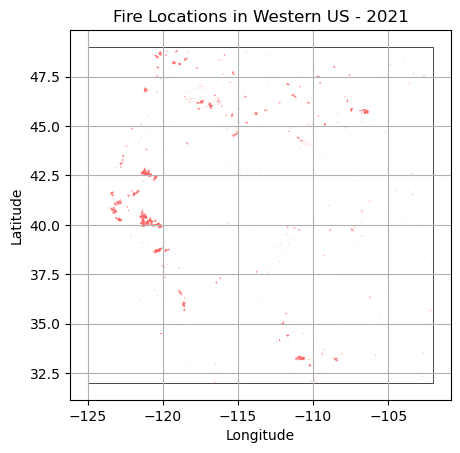

<Figure size 640x480 with 0 Axes>

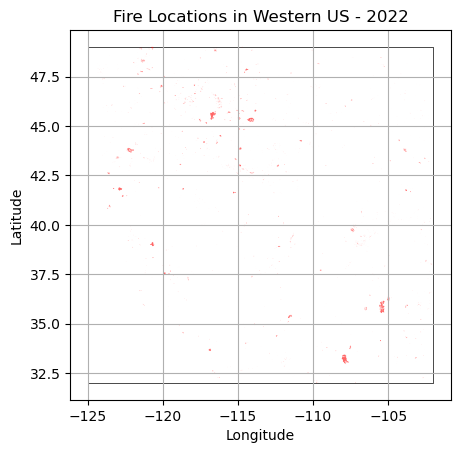

<Figure size 640x480 with 0 Axes>

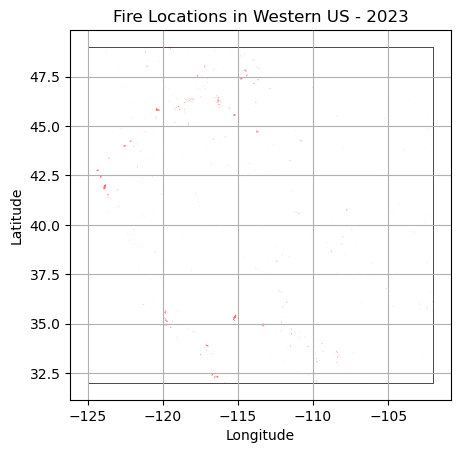

<Figure size 640x480 with 0 Axes>

In [17]:
#Fire locations by year 

plt.figure(figsize=(12, 12))

for year in sorted(WUS_fires['year'].unique()):

    yearly_data = WUS_fires[WUS_fires['year'] == year]
    
  
    base = western_us_gdf.plot(color='none', edgecolor='black', linewidth=0.5)  
    yearly_data.plot(ax=base, marker='o', color='red', markersize=2, alpha=0.6)
    

    plt.title(f'Fire Locations in Western US - {year}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    

    plt.savefig(f'fire_locations_{year}.png')  
    plt.show()  

    plt.clf()


<Figure size 1200x800 with 0 Axes>

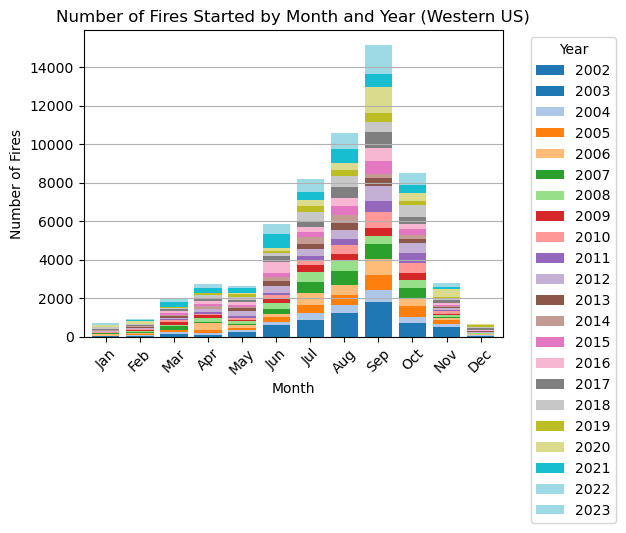

In [18]:
WUS_fires['start_month'] = pd.to_datetime(WUS_fires['initialdat']).dt.month
WUS_fires['start_year'] = pd.to_datetime(WUS_fires['initialdat']).dt.year

# 2. Group by year and month to count the number of fires
fire_counts_by_month_year = WUS_fires.groupby(['start_year', 'start_month']).size().reset_index(name='fire_count')

# 3. Pivot table for plotting
fire_counts_pivot = fire_counts_by_month_year.pivot(index='start_month', columns='start_year', values='fire_count').fillna(0)

# 4. Plotting
plt.figure(figsize=(12, 8))
fire_counts_pivot.plot(kind='bar', stacked=True, colormap='tab20', width=0.8)
plt.title('Number of Fires Started by Month and Year (Western US)')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


In [19]:
WUS_fires

,_uid_,id,initialdat,finaldate,area_ha,0,geometry,year,fire_area_ha,start_month,start_year
0,4355.0,6508161.0,2006-06-01,2006-06-01,42.970469,1,"POLYGON ((-120.36466 39.31667, -120.35749 39.3...",2006,42.970469,6,2006
1,4356.0,6508163.0,2006-06-01,2006-06-01,21.480318,1,"POLYGON ((-121.32039 38.31667, -121.31342 38.3...",2006,21.480318,6,2006
2,4357.0,6508166.0,2006-06-08,2006-06-10,150.349684,1,"MULTIPOLYGON (((-115.04956 37.93750, -115.0389...",2006,150.349684,6,2006
3,4358.0,6508178.0,2006-06-07,2006-06-09,64.421209,1,"MULTIPOLYGON (((-118.27499 36.96667, -118.2697...",2006,64.421209,6,2006
4,4359.0,6508187.0,2006-06-12,2006-06-13,558.194703,1,"POLYGON ((-117.63975 36.00833, -117.64597 36.0...",2006,558.194703,6,2006
...,...,...,...,...,...,...,...,...,...,...,...
60710,915580.0,26106138.0,2023-01-24,2023-01-24,21.485193,1,"POLYGON ((-121.66966 39.30833, -121.66242 39.3...",2023,21.485193,1,2023
60711,915581.0,26106139.0,2023-01-18,2023-01-22,171.873342,1,"MULTIPOLYGON (((-122.12710 39.09167, -122.1217...",2023,171.873342,1,2023
60712,915582.0,26106141.0,2023-01-14,2023-01-21,107.418347,1,"MULTIPOLYGON (((-122.13140 39.00417, -122.1260...",2023,107.418347,1,2023
60713,915583.0,26106142.0,2023-01-21,2023-01-21,21.483694,1,"POLYGON ((-122.09923 39.00417, -122.09204 39.0...",2023,21.483694,1,2023
